## Typeracer Data Analyzer:

A simple script that uses Pandas and Plotly to extract and visualize Typeracer.com race data

(Work in progress--more comments/explanations to come)


By Kenneth Burchfiel
Released under the MIT License


In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import time
from datetime import timedelta
import kaleido
import os
from IPython.display import Image
# Note regarding kaleido: the most recent version didn't work for me. However,
# specifying an older version by entering conda install python-kaleido=0.1.0
# worked great. See https://github.com/plotly/Kaleido/issues/120 )
from generate_screenshot import generate_screenshot

The following cell reads Typeracer race data (which I downloaded from my Typeracer account) into a Pandas DataFrame, then calculates rolling and cumulative averages.

In [2]:
df_race_data = pd.read_csv('race_data.csv')
df_race_data['Last 10 Avg'] = df_race_data['WPM'].rolling(10).mean()
df_race_data['Last 100 Avg'] = df_race_data['WPM'].rolling(100).mean()
df_race_data['Last 1000 Avg'] = df_race_data['WPM'].rolling(1000).mean()
# The following line uses a list comprehension to generate a cumulative average
# of all WPM scores up until the current race. .iloc searches from 0 to i+1 for
# each row so that that row is included in the calculation.
df_race_data['cumulative_avg'] = [round(np.mean(df_race_data.iloc[0:i+1]['WPM']),3) for i in range(len(df_race_data))]
df_race_data

,Race #,WPM,Accuracy,Rank,# Racers,Text ID,Date/Time (UTC),Last 10 Avg,Last 100 Avg,Last 1000 Avg,cumulative_avg
0,1,66,0.86,2,5,69,2017-02-22 06:13:17,NaN,NaN,NaN,66.000
1,2,96,0.95,1,5,3100075,2017-02-22 06:13:49,NaN,NaN,NaN,81.000
2,3,99,0.97,1,5,229,2017-02-22 06:14:52,NaN,NaN,NaN,87.000
3,4,82,0.97,3,5,3620380,2017-02-22 06:15:51,NaN,NaN,NaN,85.750
4,5,96,0.97,2,2,11,2017-02-22 06:16:39,NaN,NaN,NaN,87.800
...,...,...,...,...,...,...,...,...,...,...,...
4769,4770,142,0.99,1,5,3640203,2022-11-10 03:06:03,130.3,125.76,112.519,120.739
4770,4771,144,0.99,1,5,4180570,2022-11-10 03:13:54,133.2,125.75,112.636,120.744
4771,4772,138,0.99,1,4,3640261,2022-11-10 03:14:38,135.6,125.71,112.736,120.747
4772,4773,125,0.98,3,5,3621815,2022-11-10 03:17:16,135.2,125.76,112.824,120.748


Top 20 races by WPM:

In [3]:
df_race_data.sort_values('WPM', ascending = False).head(20)

,Race #,WPM,Accuracy,Rank,# Racers,Text ID,Date/Time (UTC),Last 10 Avg,Last 100 Avg,Last 1000 Avg,cumulative_avg
2601,2602,169,1.00,2,2,3620010,2017-05-26 01:17:35,134.1,132.66,134.752,126.419
3230,3231,169,1.00,1,4,9,2017-06-04 04:04:15,134.8,129.70,132.482,127.418
1767,1768,168,1.00,1,3,502,2017-05-06 22:13:39,143.0,137.54,126.531,122.757
3010,3011,167,1.00,1,5,3622459,2017-05-31 20:16:48,123.5,130.19,133.487,127.333
2949,2950,167,0.99,1,5,3622280,2017-05-31 01:15:26,135.9,131.91,134.013,127.330
2452,2453,167,1.00,1,5,3620300,2017-05-23 19:11:09,139.8,137.35,134.357,125.928
2735,2736,167,1.00,2,5,3621136,2017-05-28 02:49:40,142.2,135.59,134.659,126.920
2230,2231,167,1.00,1,3,3550074,2017-05-19 18:39:25,139.4,131.99,132.713,125.148
1763,1764,166,1.00,1,5,3620691,2017-05-06 22:09:37,134.4,137.36,126.416,122.702
1746,1747,166,1.00,1,1,224,2017-05-06 21:56:13,143.4,137.26,125.934,122.586


Top 10 'Last 10 Average' values:

In [4]:
df_race_data.sort_values('Last 10 Avg', ascending = False).head(20)

,Race #,WPM,Accuracy,Rank,# Racers,Text ID,Date/Time (UTC),Last 10 Avg,Last 100 Avg,Last 1000 Avg,cumulative_avg
2354,2355,128,0.94,2,2,3622325,2017-05-21 20:30:08,148.9,131.58,133.260,125.455
2353,2354,153,0.99,2,3,3621211,2017-05-21 20:29:30,148.5,131.69,133.280,125.454
2355,2356,147,0.97,2,4,3550009,2017-05-21 20:30:51,147.9,131.93,133.281,125.464
2488,2489,134,0.93,2,2,3100072,2017-05-23 19:42:21,146.7,138.04,134.836,126.139
2024,2025,140,0.96,1,3,3620998,2017-05-12 20:54:12,146.5,138.36,130.905,124.420
2487,2488,166,1.00,2,4,3620168,2017-05-23 19:41:40,146.3,138.03,134.832,126.135
2026,2027,153,1.00,1,4,3620202,2017-05-12 20:56:14,146.2,138.50,130.940,124.436
2489,2490,140,0.92,2,2,3621240,2017-05-23 19:43:04,146.2,138.13,134.852,126.144
2352,2353,141,0.99,1,4,46,2017-05-21 20:28:54,145.8,131.47,133.244,125.442
2351,2352,138,0.95,1,3,151,2017-05-21 20:28:04,145.6,131.45,133.242,125.436


Creating interactive charts using Plotly express: (Note: because these are HTML files, they won't display on GitHub; instead, you'll need to download and run the Jupyter notebook on your computer to view them.)

In [5]:
race_line_plot = px.line(df_race_data, x = 'Race #', y = ['WPM', 'Last 10 Avg', 'Last 100 Avg', 'Last 1000 Avg', 'cumulative_avg'])
race_line_plot.write_html('html_output/race_line_plot.html')
race_line_plot

Generating static version of this .html file using Kaleido:

In [6]:
image_width = 3000 # Interestingly, when I tried setting the image width as 3840 (e.g. UHD resolution), the x axis did not line up properly with the chart.)
image_height = image_width * 9/16
race_line_plot.write_image('png_output/race_line_plot_using_kaleido.png', width = image_width, height = image_height, engine = 'kaleido')
# See https://plotly.com/python/static-image-export/

Here's a copy of the image:

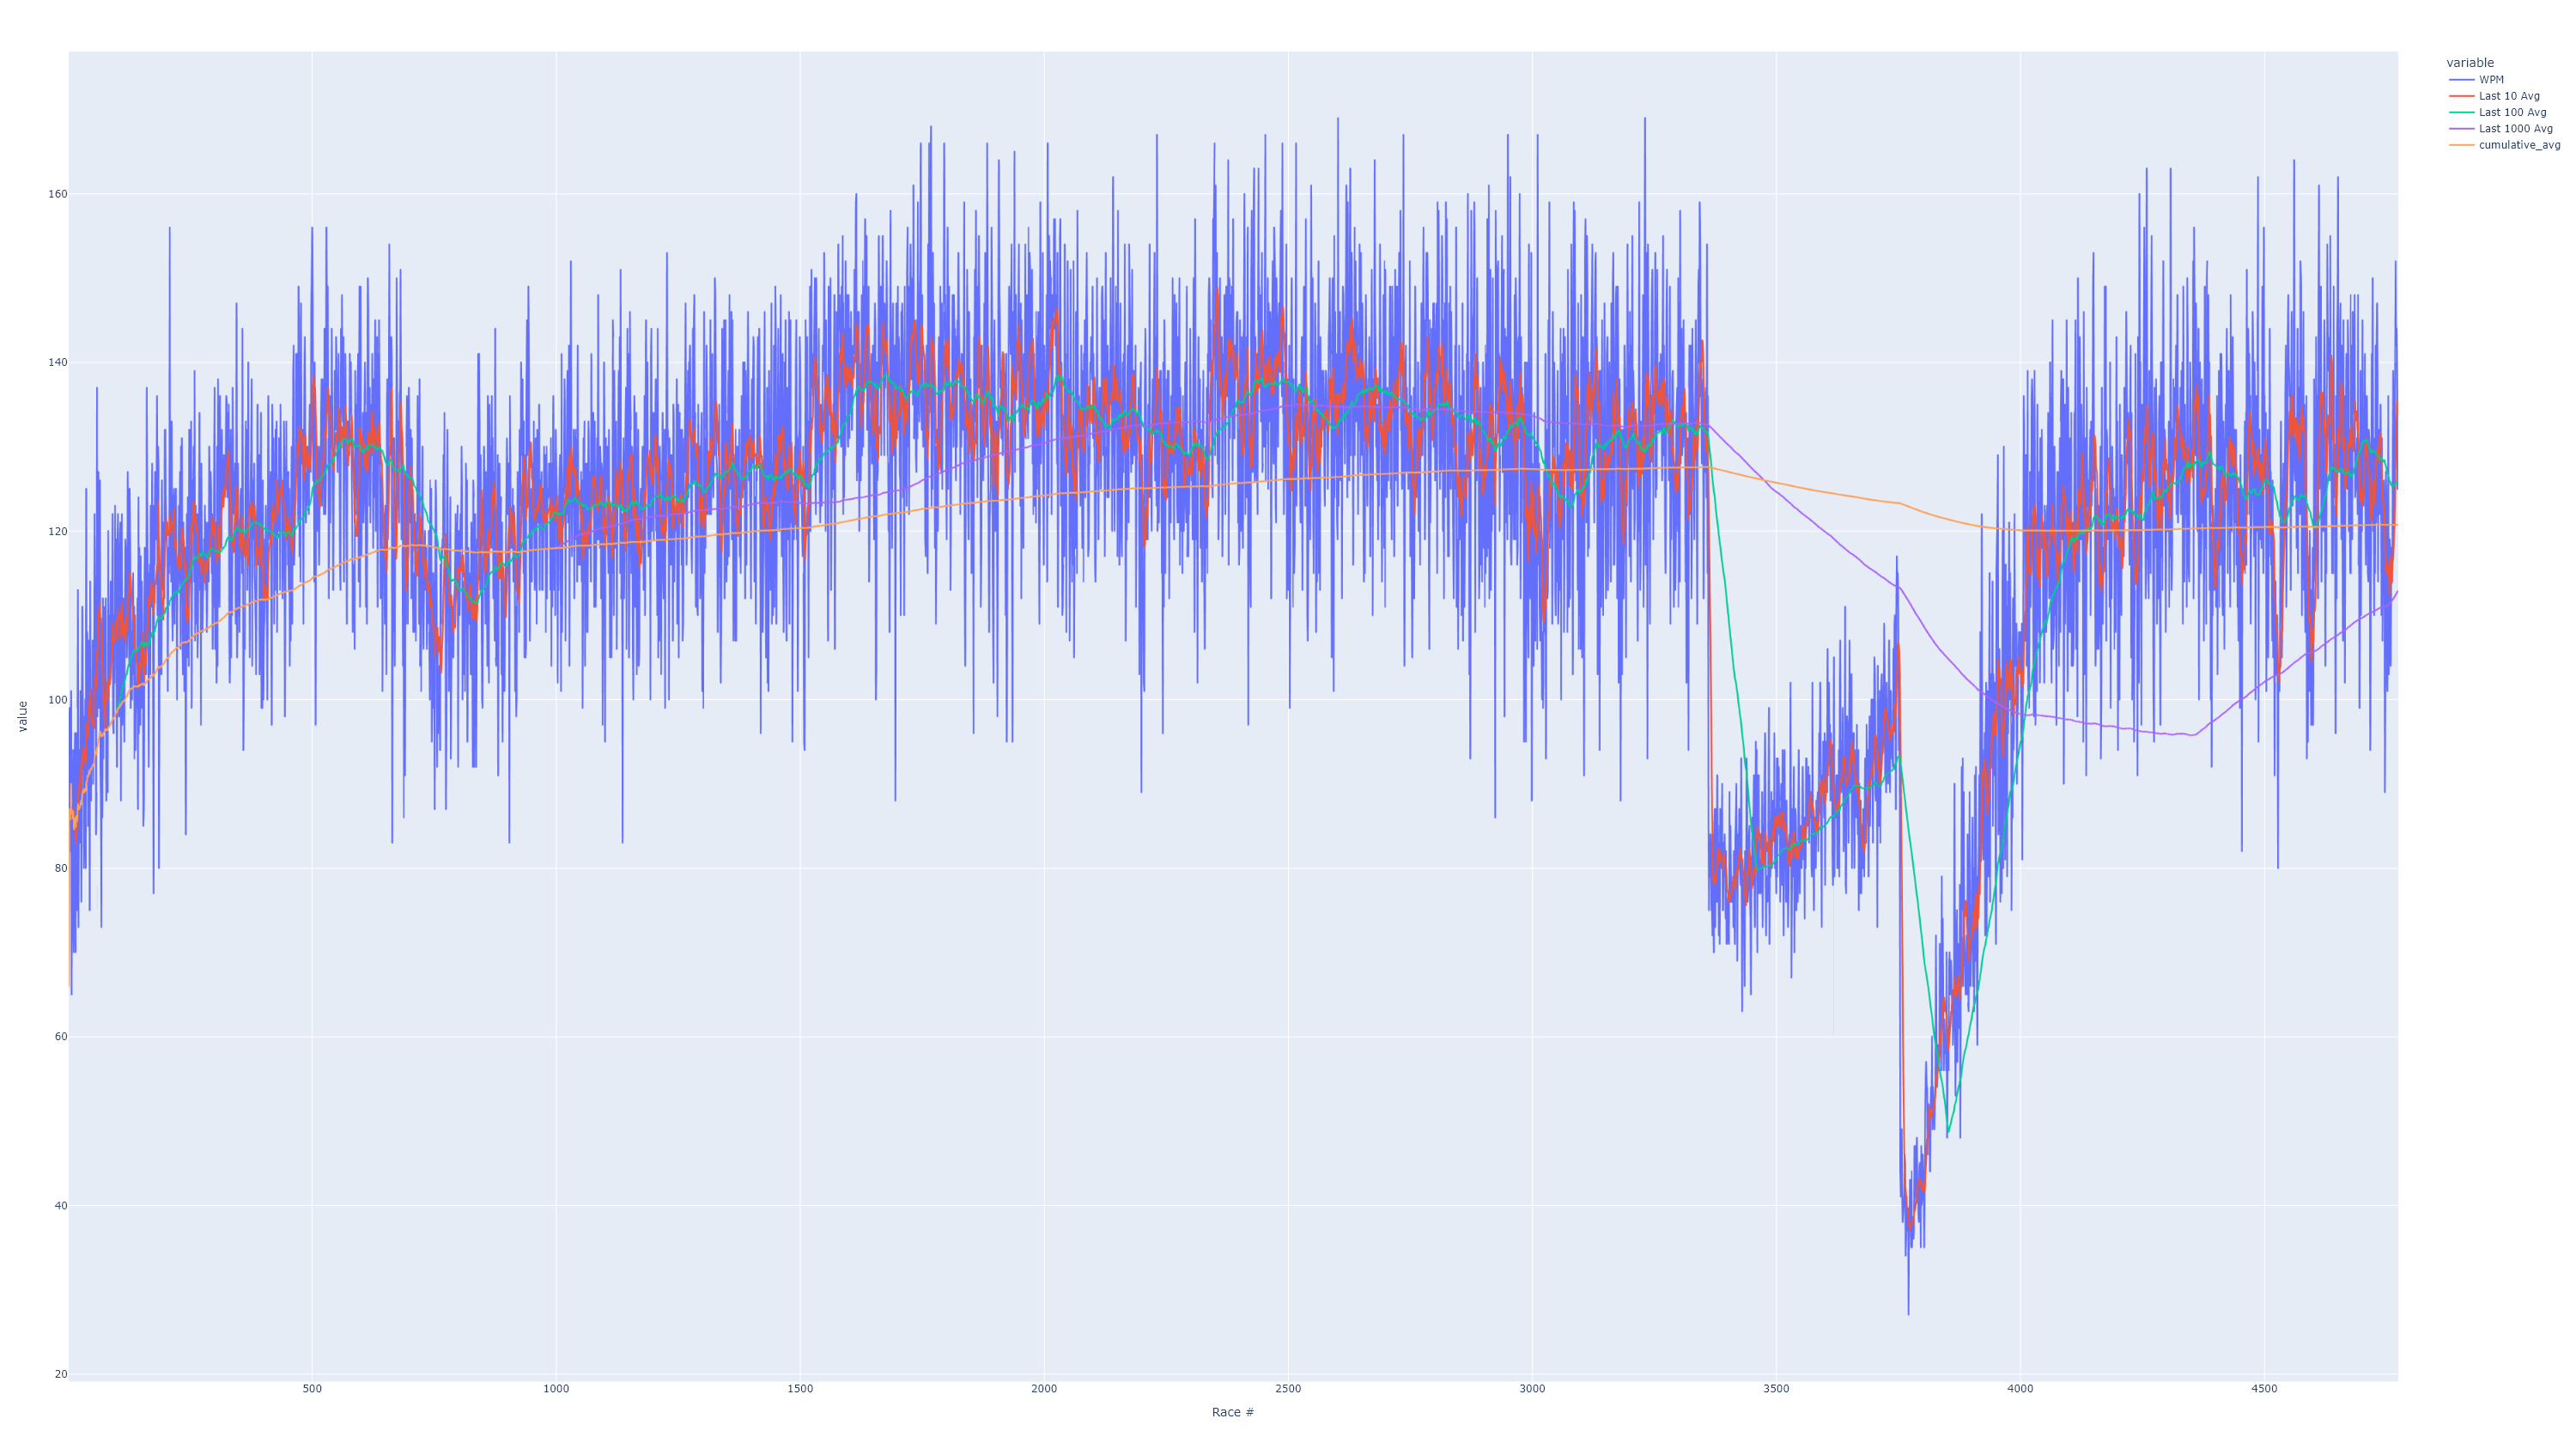

In [7]:
Image(filename = 'png_output/race_line_plot_using_kaleido.png')

Alternate method of generating the screenshot by using Selenium and a web browser: (the output is quite similar)

In [8]:
generate_screenshot(
path_to_html = os.path.join(os.getcwd(), 'html_output'),
html_name = 'race_line_plot.html', 
path_to_image = os.path.join(os.getcwd(), 'png_output'), 
image_name = 'race_line_plot_using_generate_screenshot', 
image_extension = '.png',
window_width = 3000) 
# See https://docs.python.org/3/library/os.path.html for the use of os.path.join().

Saving to: c:\Users\kburc\D1V1\Documents\!Dell64docs\Programming\py\kjb3_programs\typeracer_data_analyzer\png_output\race_line_plot_using_generate_screenshot.png
